In [61]:
'''
Feature Transformations:

- Normalization and Standardization ---> Scaling Techniques
- Scaling to Max Min vals
- Scaling to Median and Quartiles
- Gaussian Transformation
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation 

'''
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



In [19]:
# Standardization:- scaling technique that applies z-transform on each data pt to make the distribution Standard Normal Distribution

relevant_cols = ['pclass', 'age', 'fare', 'survived']
titanic = sns.load_dataset('titanic')
titanic_df = titanic[relevant_cols]
titanic_df.head()

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [25]:
# checking if cols in the df contain na vals
titanic_df.isna().sum()

pclass        0
age         177
fare          0
survived      0
dtype: int64

In [30]:
# since age has na vals --> fill with median vals

# titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True) ---> depricating soon
# titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median()) 
titanic_df.fillna({'age' : titanic_df['age'].median()}, inplace=True)
titanic_df.isna().sum()
#### All na vals dealt with


C:\Users\premt\AppData\Local\Temp\ipykernel_3456\878784707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.fillna({'age' : titanic_df['age'].median()}, inplace=True)


pclass      0
age         0
fare        0
survived    0
dtype: int64

In [42]:
### Divide between features and targets

X = titanic_df.iloc[:,:-1] # include all rows and all columns except for the last one
y = titanic_df.iloc[:,-1]

In [ ]:
### independent features
X.head()

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [45]:
## dependent target
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [49]:
### train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
### Standardization ---> set mean=0, std dev = 1 and transform the dataset to follow a standard normal distribution.

from sklearn.preprocessing import StandardScaler

### use fit transform only once to compute the mean and std dev for the scaler and then for scaling other data use only transform to ensure all data sets are using the same scaling criterion.
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
X_scaled[:5]


array([[-1.63788124, -1.91971935,  0.98099823],
       [ 0.80326712, -0.0772525 , -0.46963364],
       [ 0.80326712, -2.15002771, -0.40613632],
       [-0.41730706,  0.53690312, -0.08023177],
       [-0.41730706,  1.07428929, -0.10965138]])

In [52]:
X_test_scaled = ss.transform(X_test)
X_test_scaled[:5]

array([[ 0.80326712, -0.0772525 , -0.32547755],
       [-0.41730706,  0.15305586, -0.41855727],
       [ 0.80326712, -0.69140812, -0.46906094],
       [-0.41730706, -1.76618045,  0.02273686],
       [ 0.80326712, -1.15202483, -0.40401026]])

In [54]:
### Creating a log reg model for survival prediction

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_scaled, y_train)
log_reg.score(X_test_scaled, y_test)


0.7238805970149254

In [60]:
### Min Max Scaling ---> range for scale within [0,1]
###                 ---> majorly used in DL ---> CNNs
# X_scaled = (X - X_min / (X_max - X_min))

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm_scaled_df = pd.DataFrame(mm.fit_transform(titanic_df), columns=titanic_df.columns)
mm_scaled_df.head()


,pclass,age,fare,survived
0,1.0,0.271174,0.014151,0.0
1,0.0,0.472229,0.139136,1.0
2,1.0,0.321438,0.015469,1.0
3,0.0,0.434531,0.103644,1.0
4,1.0,0.434531,0.015713,0.0


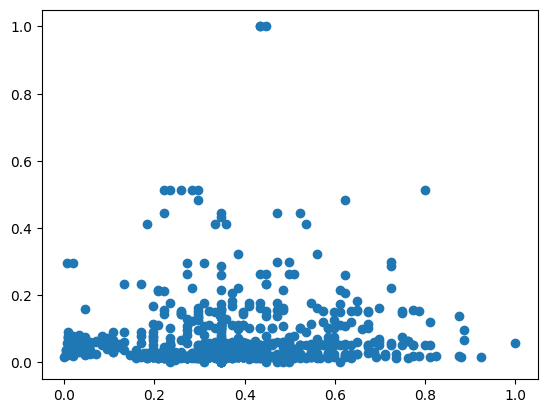

In [65]:
plt.scatter(mm_scaled_df.age, mm_scaled_df.fare)

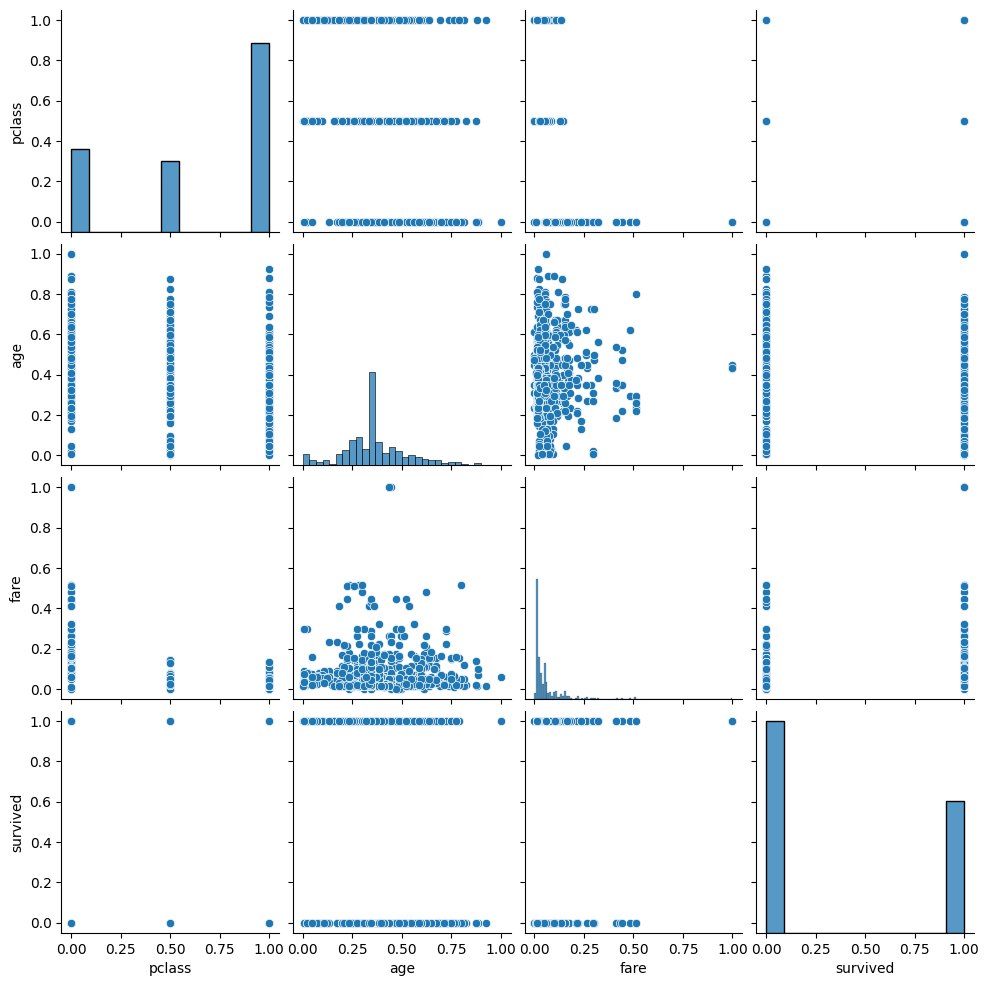

In [66]:
sns.pairplot(mm_scaled_df)

In [ ]:
### Robust Scaler ---> good for outlier detection and treatment
# used to scale features to median and quantile range
# Interquantile difference => diff between 75th and 25th quantile
# IQR = 75th Quantile - 25th Quantile ---> 75th percentile and 25th percentile
# X_scaled = (X - X.median) / IQR

from sklearn.preprocessing import RobustScaler

rbscaler = RobustScaler()
df_robust_scaler_transformed = pd.DataFrame(rbscaler.fit_transform(titanic_df), columns=titanic_df.columns)
df_robust_scaler_transformed.head()